In [34]:
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib as mpl
from omnipose.utils import rescale
import fastremap
import ncolor
import numpy as np

from micromorph import get_bacteria_list
from micromorph.segmentation import run_omnipose

In [2]:
# Load image and the corresponding mask
image = imread(r"C:\Users\u1870329\Documents\GitHub\micromorph\micromorph\test-data\microcolony_omnisegger_example.tif")

In [ ]:
# We now generate the mask using Omnipose
mask, _ = run_omnipose(image, 'bact_phase_omni', gpu_option=False, filter_options={'min_area': 50})

2025-10-28 08:20:37,424 [INFO] >>bact_phase_omni<< model set to be used
2025-10-28 08:20:37,425 [INFO] >>>> using CPU
Total segmentation time: 0.6230044364929199s


(-0.5, 341.5, 373.5, -0.5)

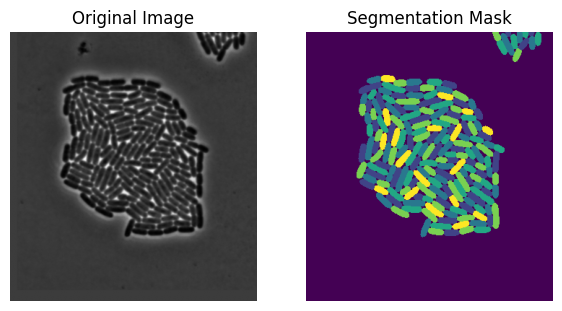

In [ ]:
# and assess the mask quality
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Recolor the mask for better visualization
m,_ = fastremap.renumber(mask) # make sure masks go from 0 to N
cmap = mpl.colormaps.get_cmap('viridis')
recoloured_mask = cmap(rescale(ncolor.label(m)))

ax[1].imshow(recoloured_mask)
ax[1].set_title('Segmentation Mask')
ax[1].axis('off')

In [21]:
# Now use the `get_bacteria_list` function to analyse all the bacteria in the image
bacteria_list = get_bacteria_list(image, mask, options={'pxsize': 110, 'fit_type': 'phase'})

2025-10-28 08:31:14,050 [INFO] Making a pool for multiprocessing - this only happens once!
2025-10-28 08:31:14,163 [INFO] Pool created!


100%|██████████| 183/183 [00:24<00:00,  7.36it/s]


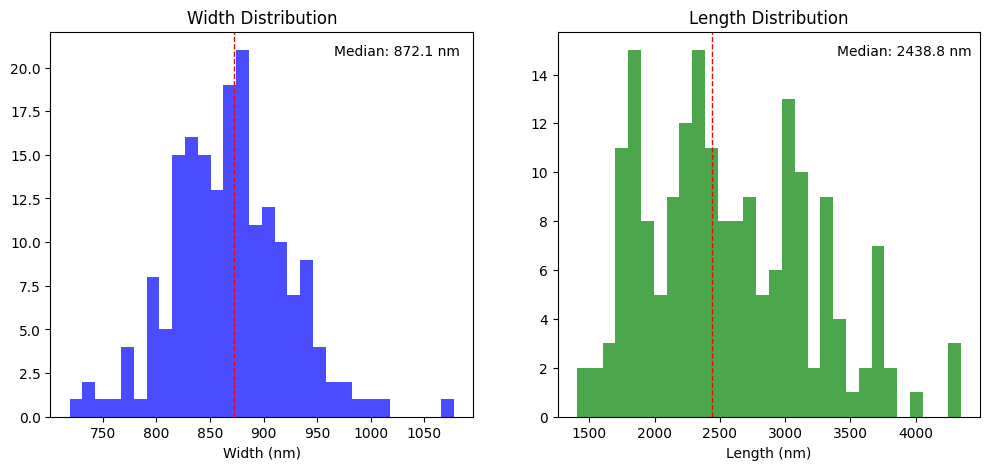

In [55]:
# Let's visualise the distribution of lengths and widths
widths = [bacteria.width for bacteria in bacteria_list]
lengths = [bacteria.length for bacteria in bacteria_list]

# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(widths, bins=30, color='blue', alpha=0.7)
ax[0].axvline(np.median(widths), color='red', linestyle='dashed', linewidth=1)
ax[0].text(0.82, 0.95, f'Median: {np.median(widths):.1f} nm', horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes)
ax[0].set_title('Width Distribution')
ax[0].set_xlabel('Width (nm)')

ax[1].hist(lengths, bins=30, color='green', alpha=0.7)
ax[1].axvline(np.median(lengths), color='red', linestyle='dashed', linewidth=1)
ax[1].text(0.82, 0.95, f'Median: {np.median(lengths):.1f} nm', horizontalalignment='center', verticalalignment='center', transform = ax[1].transAxes)
ax[1].set_title('Length Distribution')
ax[1].set_xlabel('Length (nm)')
plt.show()

(-0.5, 341.5, 373.5, -0.5)

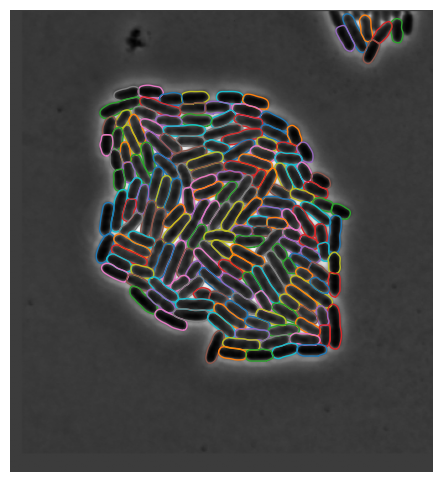

In [ ]:
# we can also plot cell boundaries
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')

for bacteria in bacteria_list:
    bbox = bacteria.bbox

    cell_boundary = bacteria.boundary + np.array([bbox[1]-1, bbox[0]-1]) # 1px offset is due to padding during calculations
    cell_midline = bacteria.medial_axis_extended + np.array([bbox[1]-1, bbox[0]-1])
    ax.plot(cell_boundary[:, 0], cell_boundary[:, 1], linewidth=1)

ax.axis('off')